# Porto Seguro’s Safe Driver Prediction : Exploratory Data Analysis

<img src="image.jpg">


# 1. Business/ Real-world constraints :

## 1.1. Problem statement : 

<p>
Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees.<br><br>Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.
<br><br>
In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
</p>

## 1.2. Objectives and constraints :

<p>
    1. Increasing Gini Coefficient. The Gini Coefficient ranges from approximately 0 for random              guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete          calculation is (1 - frac_pos) / 2.<br><br>
    2. Time is not a constraint in this case study.<br><br>
    3. Cost of misclassifying can be high. So more emphesis should on increasing Recall and F1-Score.
</p>

## Useful References :
<p>
    1. <a href="https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda">https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda</a>
    <br><br>
    2. <a href = "https://www.youtube.com/watch?v=mbxZ_zqHV9c">https://www.youtube.com/watch?v=mbxZ_zqHV9c</a>
    <br><br>
    3. <a href="https://www.kaggle.com/ogrellier/noise-analysis-of-porto-seguro-s-features">https://www.kaggle.com/ogrellier/noise-analysis-of-porto-seguro-s-features</a>
</p>

## 1. Importing libraries and Loading data :

In [0]:
# Importing essential libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_tr = pd.read_csv("/content/drive/My Drive/train.csv")
data_te = pd.read_csv("/content/drive/My Drive/test.csv")
print("Train data : {0}\nTest data : {1}".format(data_tr.shape, data_te.shape))

Train data : (595212, 59)
Test data : (892816, 58)


In [0]:
y_tr = data_tr["target"]
data_tr = data_tr.drop(["target", "id"], axis = 1)
data_te = data_te.drop("id", axis = 1)

In [0]:
data_tr.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [0]:
y_tr.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
data_te.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


## 2. Exploratory data analysis :

In [0]:
positive_class = y_tr.value_counts()[1]
negative_class = y_tr.value_counts()[0]
print("{0:0.2f}% of total points belongs to positive class."\
      .format((positive_class/(positive_class + negative_class)*100)))
print("{0:0.2f}% of total points belongs to negative class."\
      .format((negative_class/(positive_class + negative_class)*100)))

3.64% of total points belongs to positive class.
96.36% of total points belongs to negative class.


<p>1. There is very high imbalance which is evident of the fact that only a small number of people actually file their claim.<br>
2. Accuracy is not a good metric in this case.Recall and F1-Score is a better option.</p>

### Visualizing individual binary features :

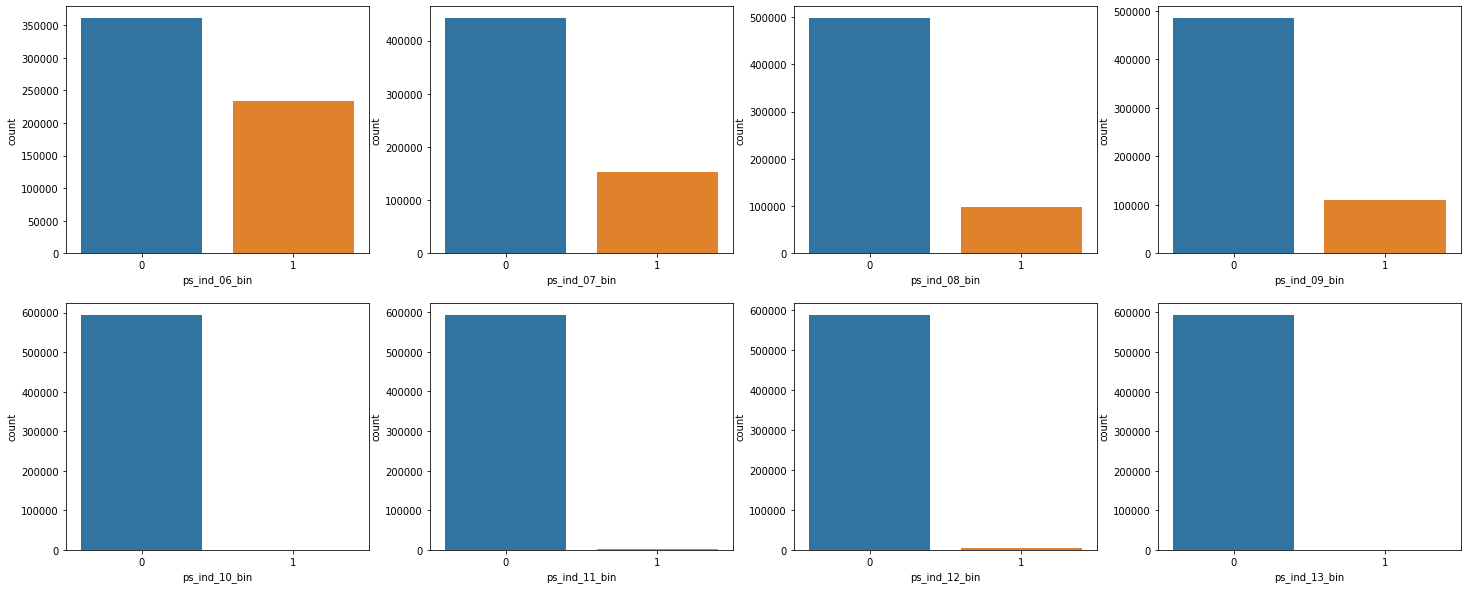

In [0]:
#Set - 1
ind_bin_feature_set_1 = data_tr.columns[5:13]
fig, ax = plt.subplots(2, 4)
fig.set_size_inches((25,10))
cnt = 0
for i in range(2) :
  for j in range(4) :
    sns.countplot(x=ind_bin_feature_set_1[cnt], data = data_tr, ax=ax[i,j])
    cnt+=1
plt.show()

## Summary :
### 1. Features in the 2nd row has very high imbalance and contains same value for almost all the data points. Such features are of little use.
### 2. Features in the 1st row have more balance than the second row and hence, they are more useful.

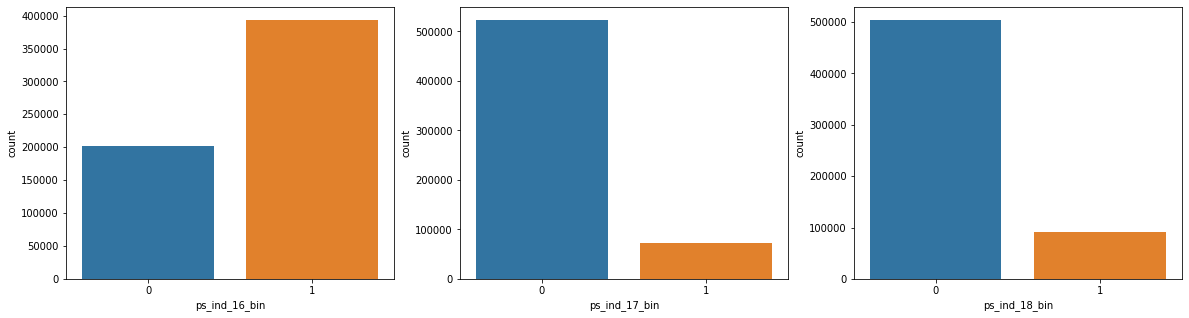

In [0]:
#Set - 2
ind_bin_feature_set_2 = data_tr.columns[15:18]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((20,5))
cnt = 0
for j in range(3) :
  sns.countplot(x=ind_bin_feature_set_2[cnt], data = data_tr, ax=ax[j])
  cnt+=1
plt.show()

## Summary :
### 1. "ps_ind_16_bin" shows more balance than the other two.

### Visualizing individual categorical features :

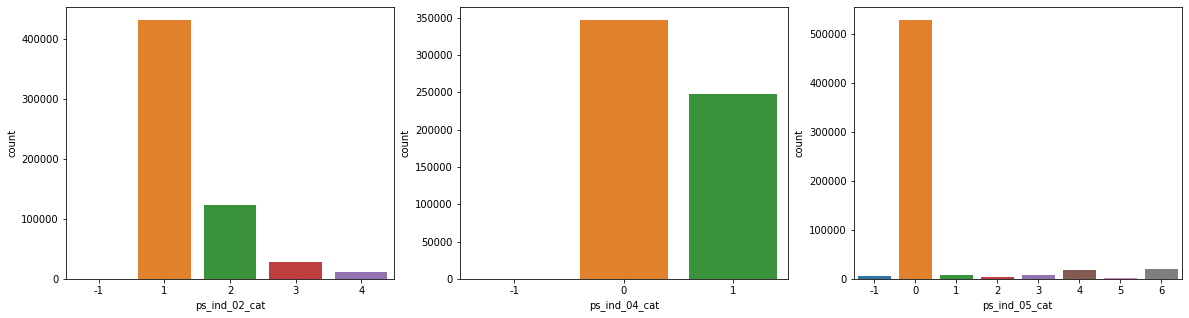

In [0]:
ind_cat_features = ["ps_ind_02_cat", "ps_ind_04_cat", "ps_ind_05_cat"]
fig, ax = plt.subplots(1,3)
fig.set_size_inches((20,5))
for i in range(3) :
  sns.countplot(x=ind_cat_features[i], data = data_tr, ax=ax[i])
plt.show()

## Summary :
### 1. The number of levels in the individual categorical features are very low.
### 2. In the 1st two of them, a couple of features are dominating            while in the 3rd one, only a single feature is very dominating.        This  makes it of little use.

### Visualizing individual continuous/ordinal features :

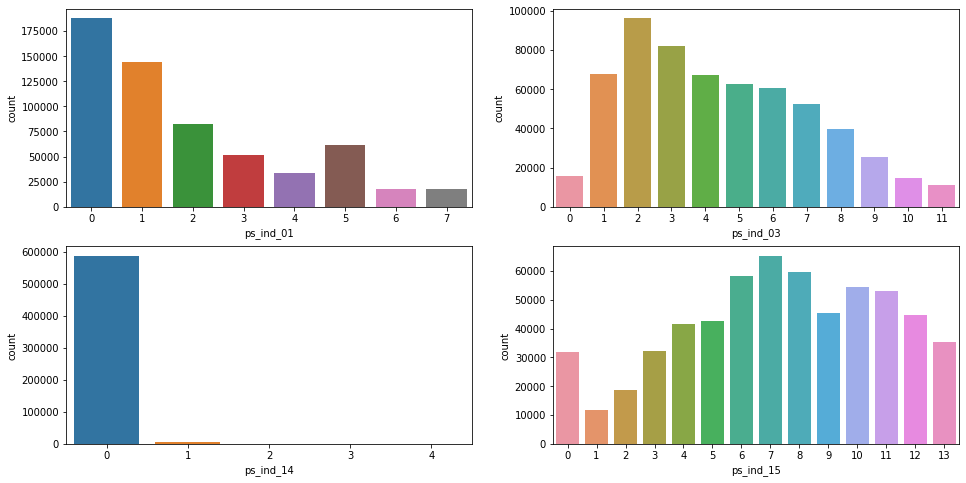

In [0]:
ind_cont_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14", "ps_ind_15"]
fig, ax = plt.subplots(2,2)
fig.set_size_inches((16,8))
cnt = 0
for i in range(2) :
  for j in range(2) :
    sns.countplot(x = ind_cont_features[cnt], data = data_tr, ax = ax[i,j])
    cnt+=1
plt.show()

## Summary :
### 1. The continuous features behaves more or less like the categorical features.
### 2. All of them are quite balanced except for "ps_ind_14".

## Visualizing the regional features :

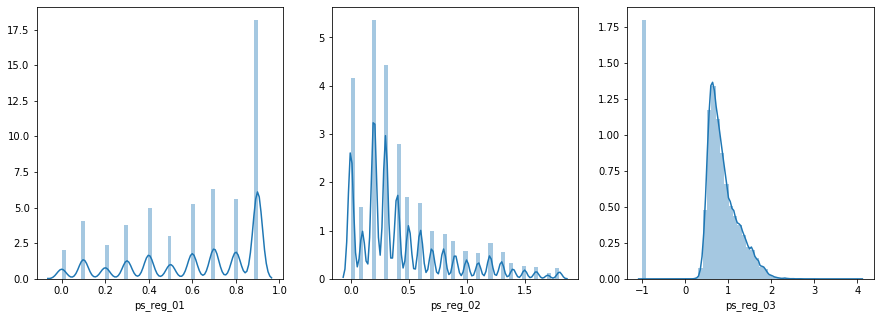

In [0]:
reg_features = ["ps_reg_01", "ps_reg_02", "ps_reg_03"]
fig, ax = plt.subplots(1,3)
fig.set_size_inches((15,5))
for i in range(3) :
  sns.distplot(data_tr[reg_features[i]], ax=ax[i])
plt.show()

## Summary :
### 1. "ps_reg_01" behaves as a categorical feature with 10 categories while the other two behaves more like continuous features.

## Visualizing car categorical features :

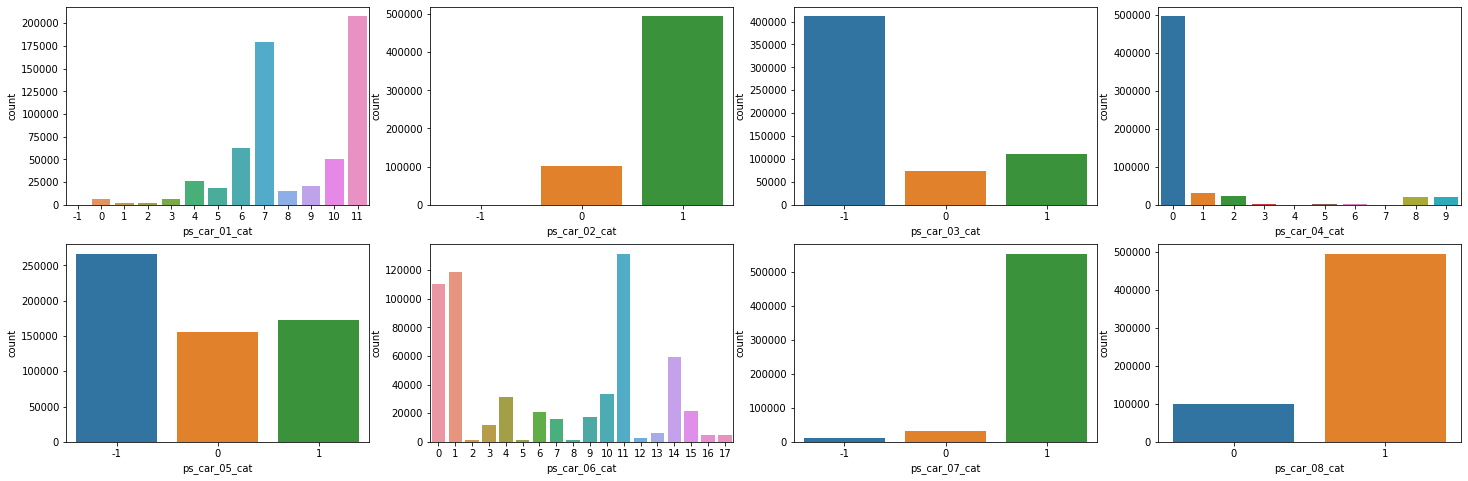

In [0]:
car_cat_features_set_1 = data_tr.columns[21:29]
fig, ax = plt.subplots(2,4)
fig.set_size_inches((25,8))
cnt = 0
for i in range(2) :
  for j in range(4) :
    sns.countplot(x = car_cat_features_set_1[cnt], data = data_tr, ax = ax[i,j])
    cnt+=1
plt.show()

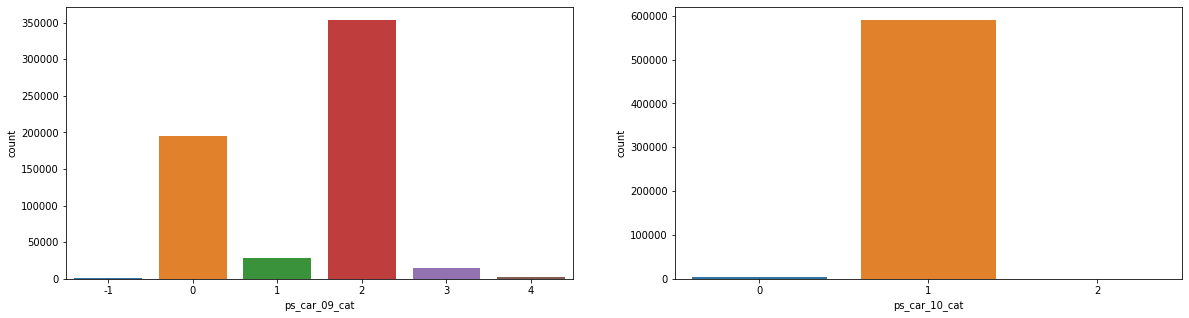

In [0]:
car_cat_features_set_2 = data_tr.columns[29:31]
fig, ax = plt.subplots(1,2)
fig.set_size_inches((20,5))
for i in range(2) :
  sns.countplot(x = car_cat_features_set_2[i], data = data_tr, ax = ax[i])
plt.show()

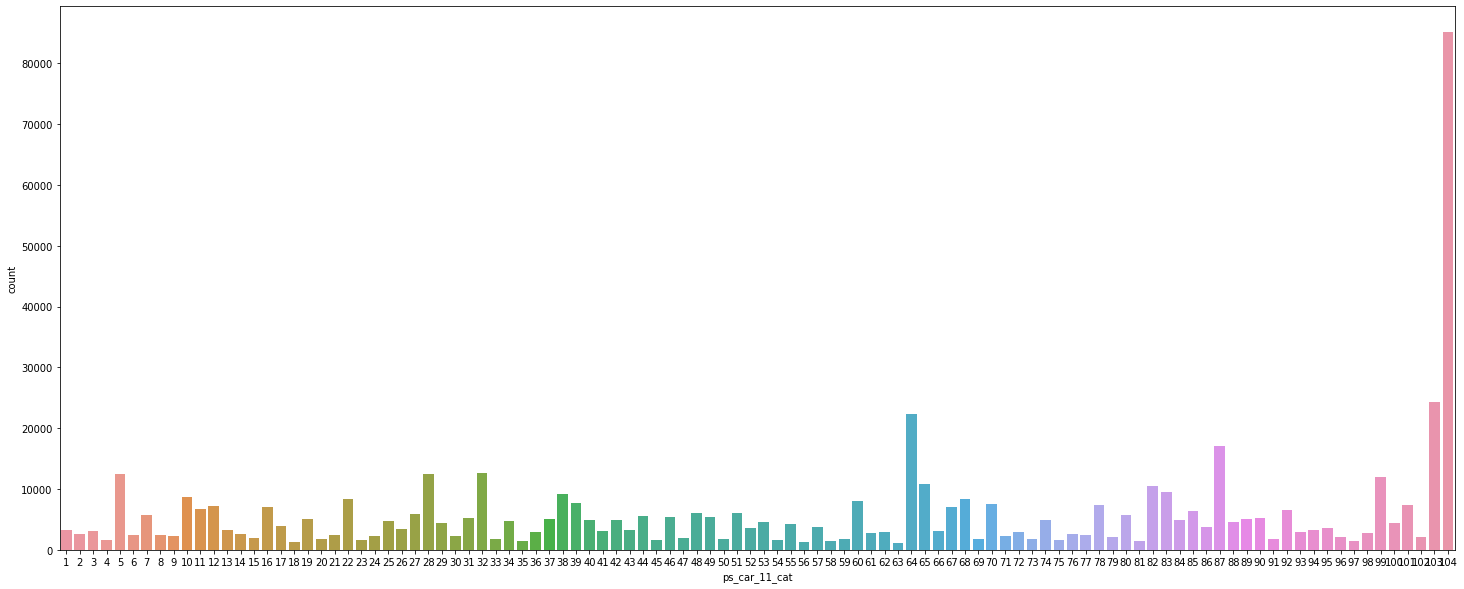

In [0]:
fig = plt.figure(figsize=(25,10))
sns.countplot(x = "ps_car_11_cat", data = data_tr)
plt.show()

## Summary : After visualizing all the categorical features for the car features, we can conclude the following.
### 1. 'ps_car_11_cat' is the car categorical features with the most number of levels (104).
### 2. Most features show some balance except for 'ps_car_10_cat' which is severly imbalanced.

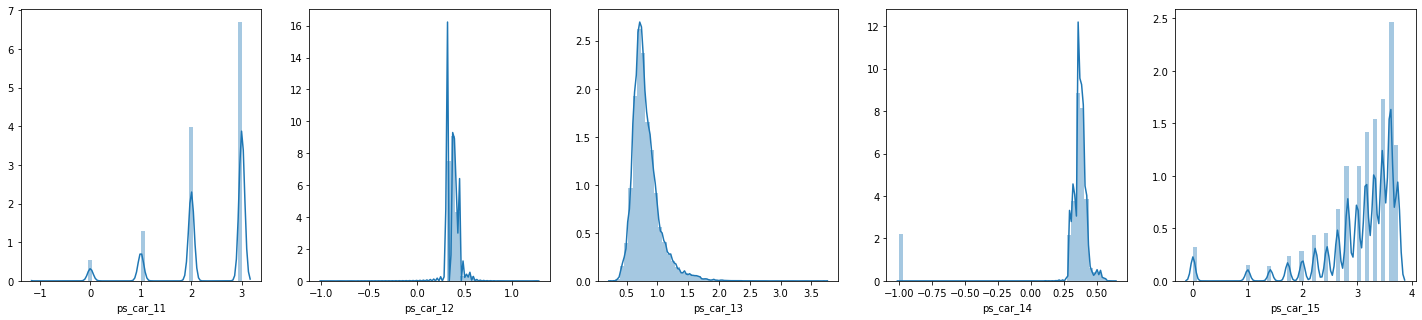

In [0]:
car_cont_features = data_tr.columns[32:38]
fig, ax = plt.subplots(1,5)
fig.set_size_inches((25,5))
for i in range(5) :
  sns.distplot(data_tr[car_cont_features[i]], ax = ax[i])
plt.show()

## Summary :
### 1. "ps_car_11" resembles more to a categorical feature. Rest of them are continuous.

## Visualizing calculated continuous/ordinal features :

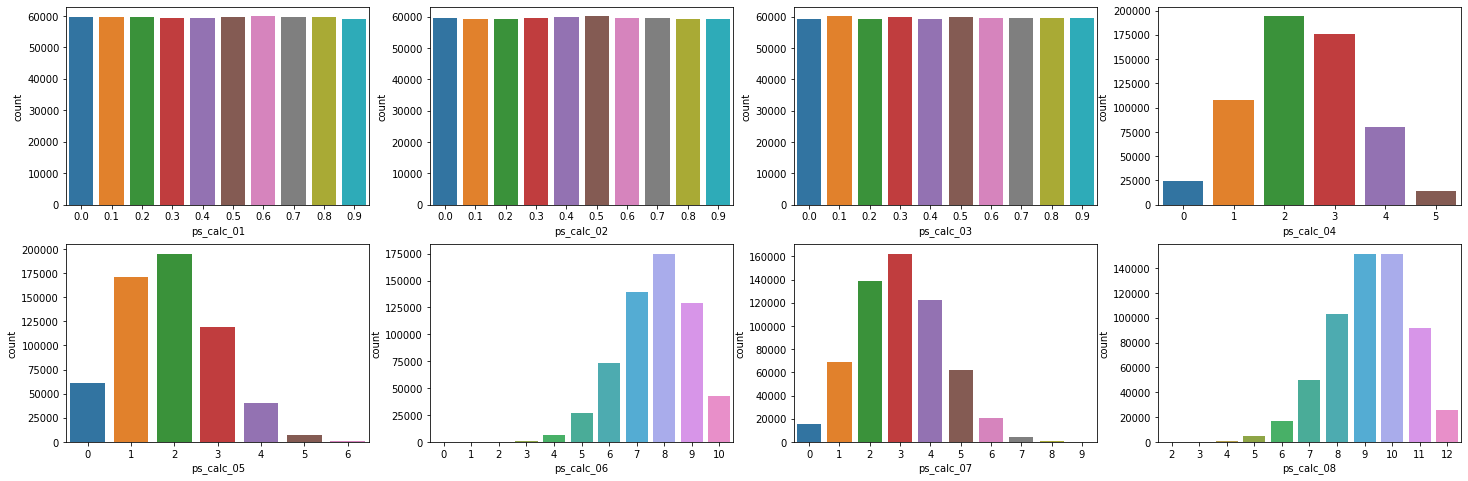

In [0]:
calc_cont_1 = data_tr.columns[37:45]
fig, ax = plt.subplots(2,4)
fig.set_size_inches((25,8))
cnt = 0
for i in range(2) :
  for j in range(4) :
    sns.countplot(x = calc_cont_1[cnt], data = data_tr, ax = ax[i,j])
    cnt+=1
plt.show()

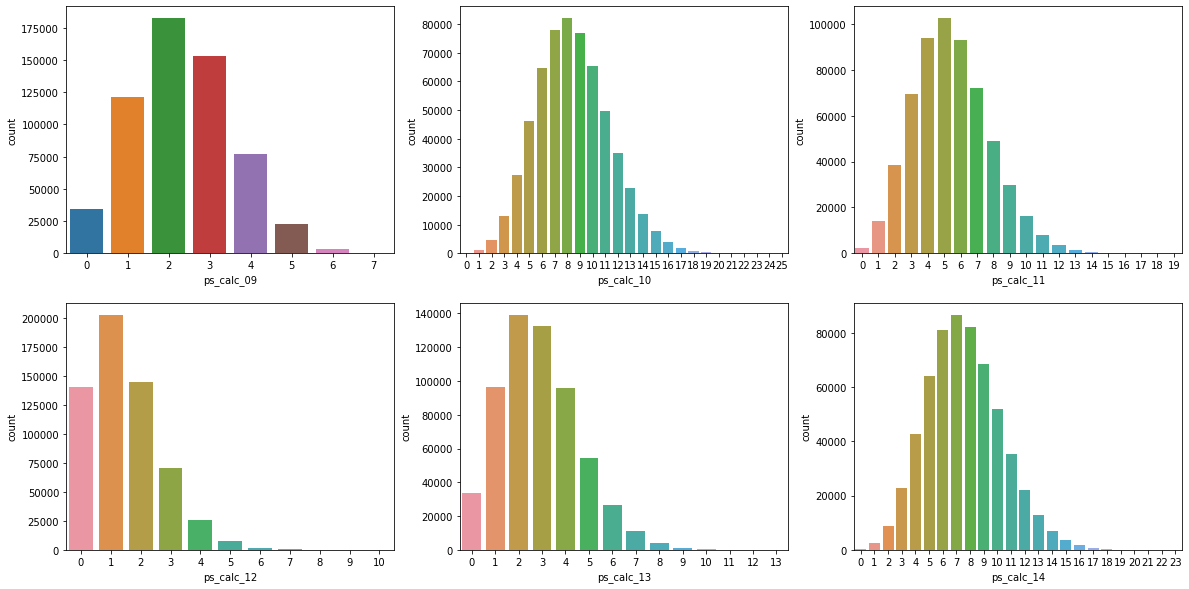

In [0]:
calc_cont_2 = data_tr.columns[45:51]
fig, ax = plt.subplots(2,3)
fig.set_size_inches((20,10))
cnt = 0
for i in range(2) :
  for j in range(3) :
    sns.countplot(x = calc_cont_2[cnt], data = data_tr, ax = ax[i,j])
    cnt+=1
plt.show()

## Summary :
### 1. None of the calculated continuous/ordinal features are continuous/ordinal in nature.
### 2. "ps_calc_01", "ps_calc_02" and "ps_calc_03" shows balanced behavior.
### 3. Rest of them shows normal distribution.

## Visualizing calculated binary features :

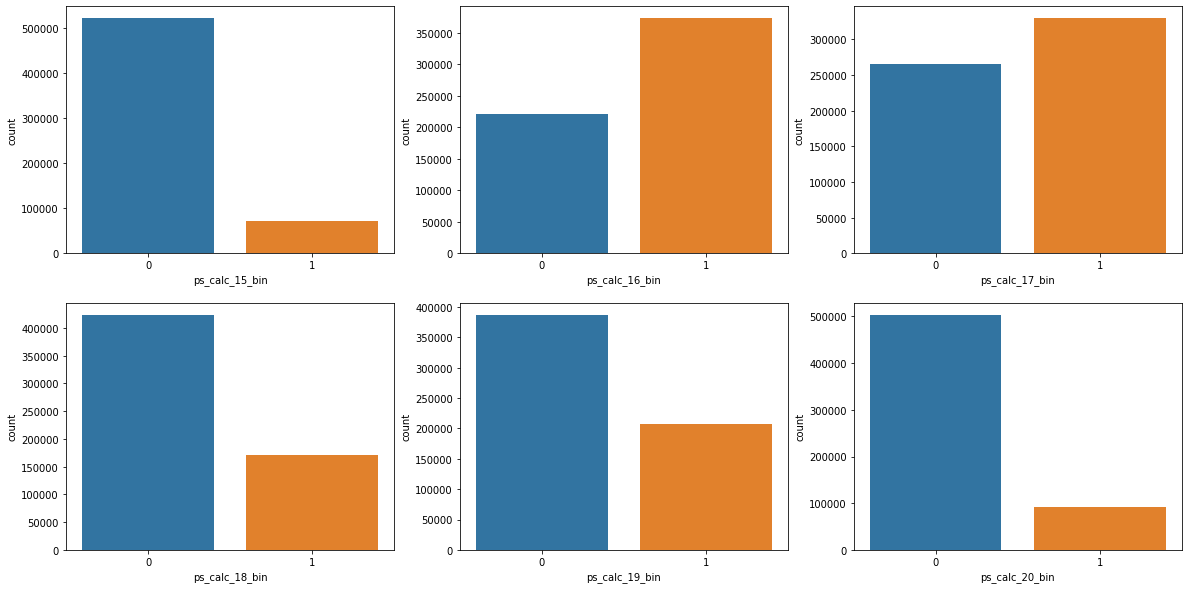

In [0]:
calc_bin_features = data_tr.columns[-6:]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches((20,10))
cnt = 0
for i in range(2) :
  for j in range(3) :
    sns.countplot(x = calc_bin_features[cnt], data = data_tr, ax = ax[i,j])
    cnt+=1
plt.show()

## Multi-Feature Comparisions :


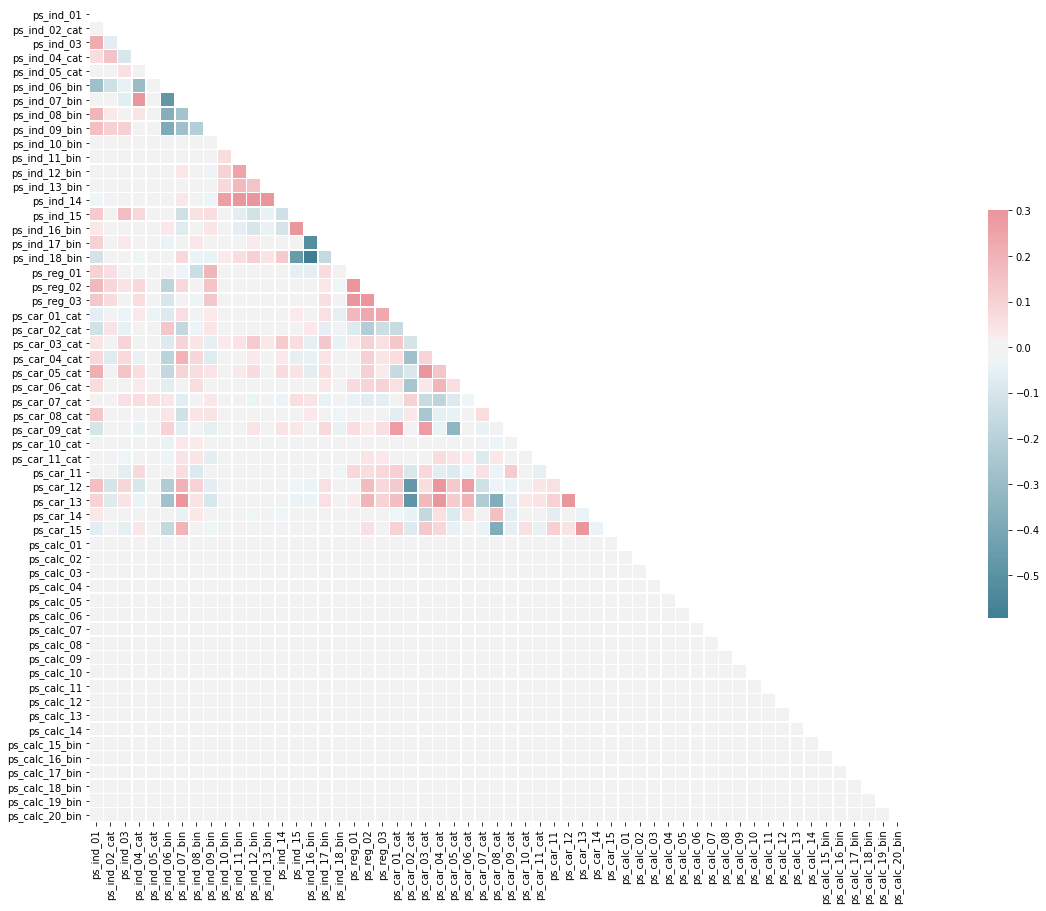

In [0]:
#Source : https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = data_tr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Summary :
### 1. Majority of the features do not show any significant correlation.
### 2. There are a few features that show some negative correlation.
### 3. Positive correlation is also very rare and weak.
### 4. We can safely conclude that our features are independent.